In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#데이터 불러오기
data=pd.read_csv('train.csv')

In [4]:
#데이터 앞의 5행 미리보기
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#데이터 변수 형태 확인하기
data.info()
# Survived: Survival (0 = No; 1 = Yes)
# Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# SibSp: Number of Siblings/Spouses Aboard
# Parch: Number of Parents/Children Aboard

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#명목형 변수인 'Survived', 'Pclass'가 int64로 되어있어 object로 바꿔주기
data['Survived'] = data['Survived'].astype(object)
data['Pclass'] = data['Pclass'].astype(object)

In [7]:
#각 변수의 결측값 개수 확인하기
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#결측값이 있는 변수를 추출하고 전체에서 결측값이 차지하는 비율 나타내기
missing_df = data.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / data.shape[0]
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio
5,Age,177,0.198653
10,Cabin,687,0.771044
11,Embarked,2,0.002245


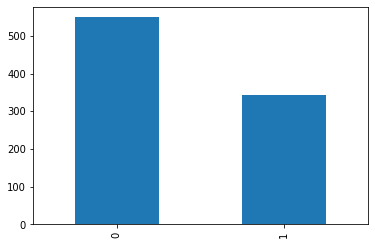

In [10]:
#종속변수의 분포 확인하기
data['Survived'].value_counts().plot(kind='bar')
plt.show()

In [11]:
#명목형 변수의 분포 알아보기
category_feature = [ col for col in data.columns if data[col].dtypes == "object"]
category_feature

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [12]:
#명목형 변수를 새로운 변수에 리스트의 형태로 저장하는데, 기본키와 종속변수는 제외하고 저장하기
category_feature = list(set(category_feature) - set(['PassengerId','Survived']))
category_feature

['Sex', 'Embarked', 'Name', 'Ticket', 'Pclass', 'Cabin']

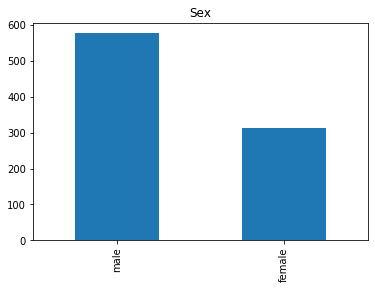

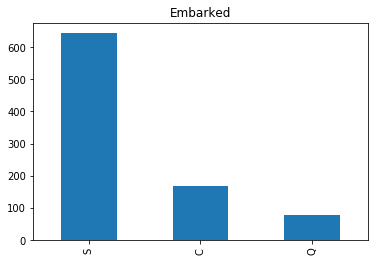

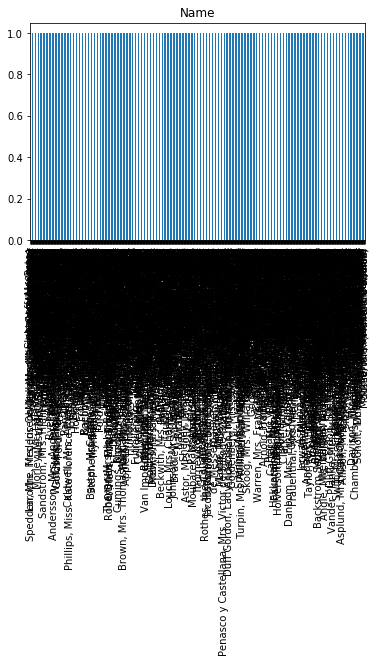

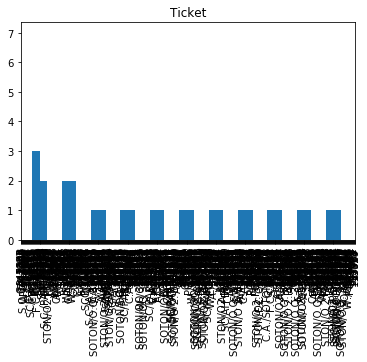

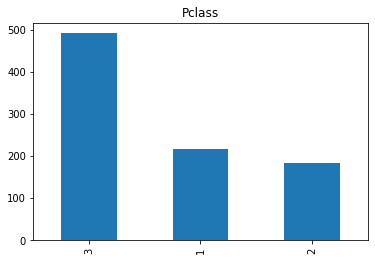

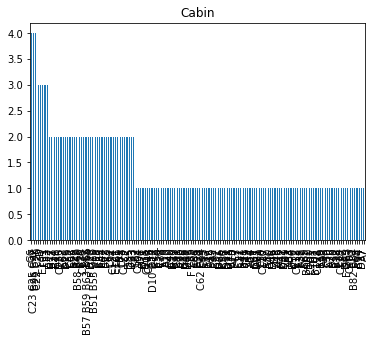

In [14]:
#변수별로 분포 확인하기
for col in category_feature: 
    data[col].value_counts().plot(kind='bar') 
    plt.title(col) 
    plt.show()

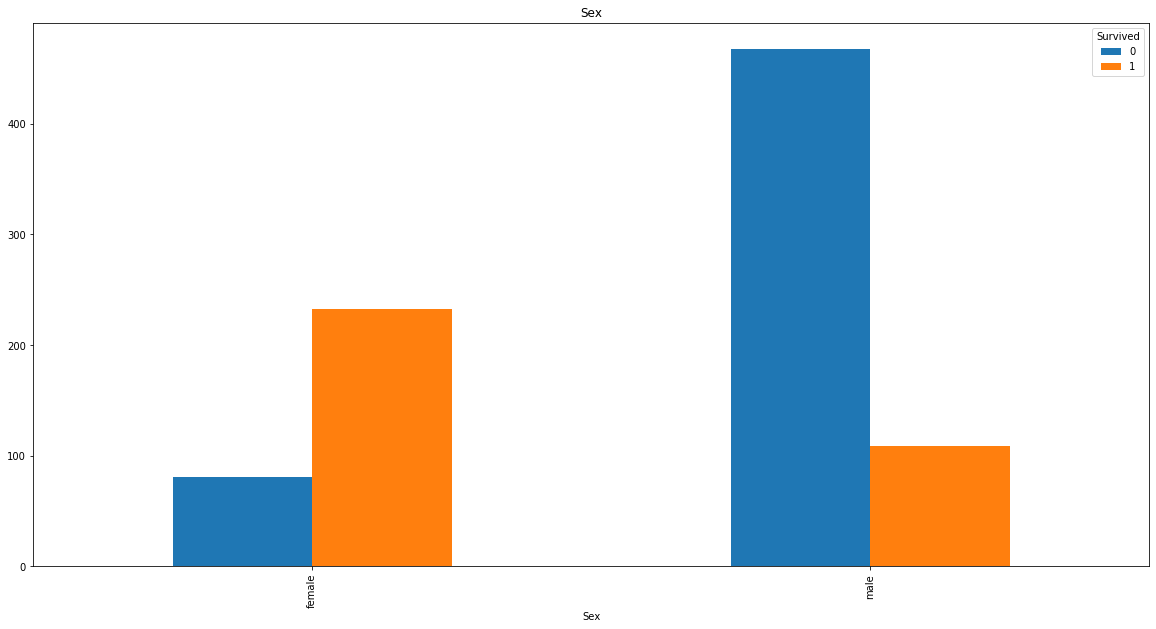

In [15]:
sex_df = data.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind='bar', figsize=(20,10))
plt.title('Sex')
plt.show()

In [17]:
#수치형 변수의 분포 알아보기
#우선, 전체 변수에서 수치형 변수만 추출한다.
numerical_feature = list(set(data.columns) - set(category_feature) - set(['PassengerId','Survived']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['Age', 'Fare', 'Parch', 'SibSp'], dtype='<U5')

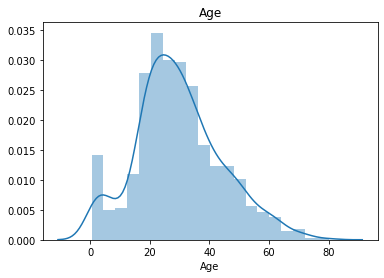

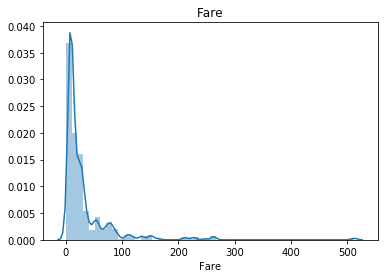

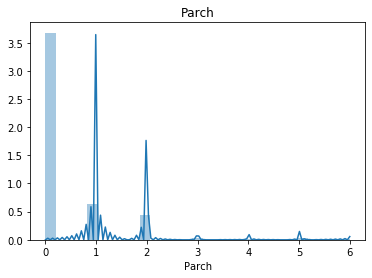

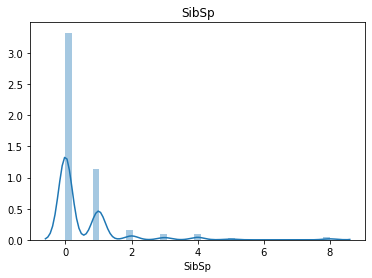

In [20]:
#변수별로 분포 확인하기
for col in numerical_feature:
    sns.distplot(data.loc[data[col].notnull(), col])
    plt.title(col)
    plt.show()

C:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


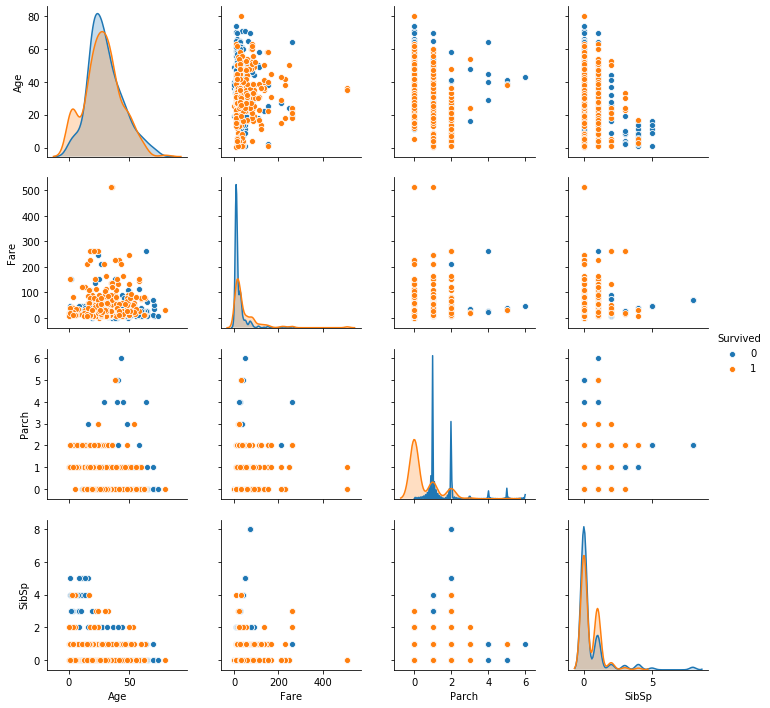

In [21]:
#이변수, 삼변수 탐색하기
sns.pairplot(data[list(numerical_feature) + ['Survived']], hue='Survived', 
             x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()

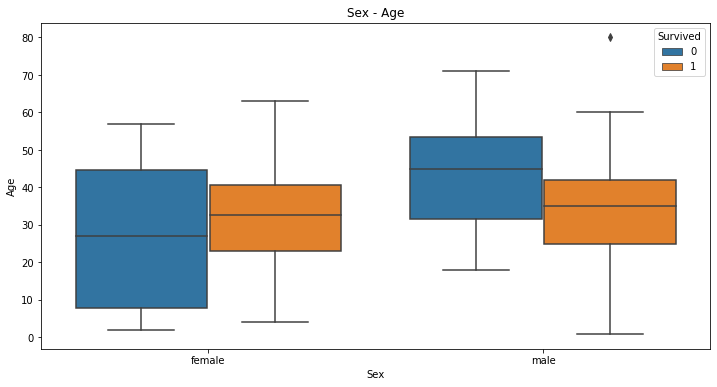

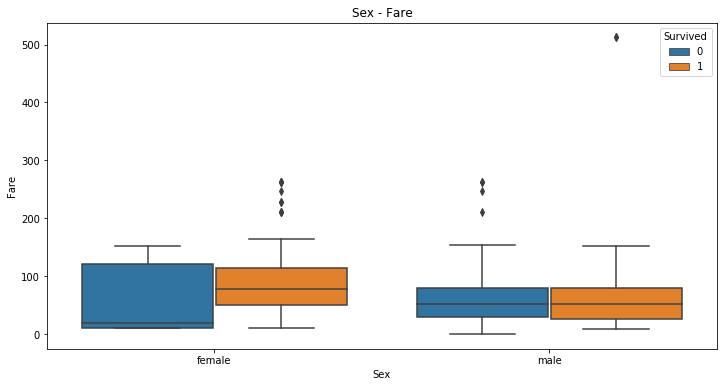

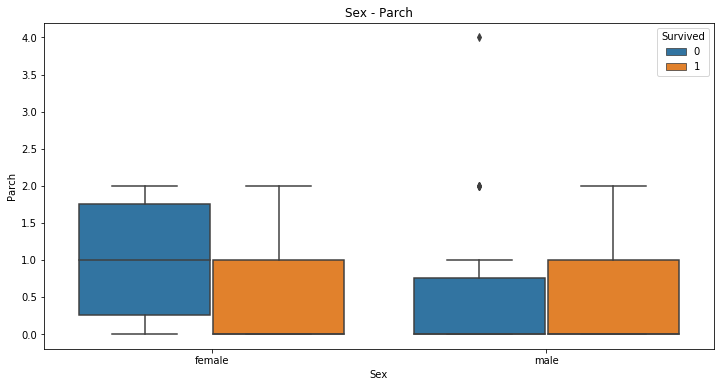

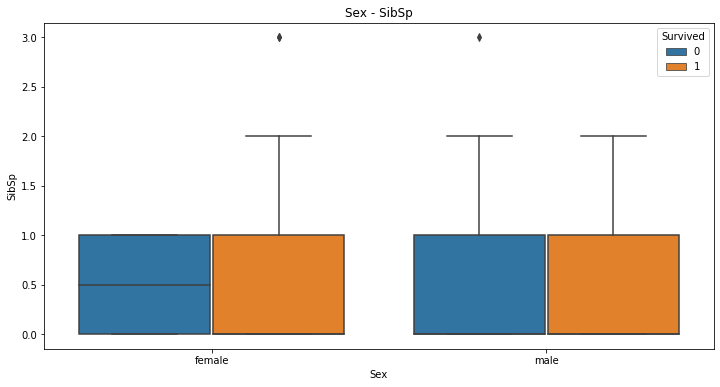

In [22]:
#수치형, 명목형 변수 간의 관계 확인하기
unique_list = data['Sex'].unique()
 
for col in numerical_feature:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Sex', y=col, hue='Survived', data=data.dropna())
    plt.title("Sex - {}".format(col))
    plt.show()